# Defining caffenet

In [1]:
from tfs.models import CaffeNet
import tensorflow as tf

tf.reset_default_graph()
net = CaffeNet([1,227,227,3])

In [2]:
for l in net.layers:
    print l.name

conv1
pool1
norm1
conv2
pool2
norm2
conv3
conv4
conv5
pool5
fc6
fc7
fc8
prob


In [3]:
from tfs.adapter import DeconvVisNet
visnet = DeconvVisNet(net)

Softmax doesn't define inverse op, ignore the layer
inv_fc [1, 1000]->[1, 4096]
inv_fc [1, 4096]->[1, 4096]
inv_fc [1, 4096]->[1, 9216]
reshaped
inv_max_pool [1, 6, 6, 256]->[1, 13, 13, 256]
inv_conv [1, 13, 13, 256]->(1, 13, 13, 384)
inv_conv [1, 13, 13, 384]->(1, 13, 13, 384)
inv_conv [1, 13, 13, 384]->(1, 13, 13, 256)
LRN doesn't define inverse op, ignore the layer
inv_max_pool [1, 13, 13, 256]->[1, 27, 27, 256]
inv_conv [1, 27, 27, 256]->(1, 27, 27, 96)
LRN doesn't define inverse op, ignore the layer
inv_max_pool [1, 27, 27, 96]->[1, 55, 55, 96]
inv_conv [1, 55, 55, 96]->(1, 227, 227, 3)


In [4]:
visnet._inv_out

<tf.Tensor 'inv_conv1/conv2d_transpose:0' shape=(1, 227, 227, 3) dtype=float32>

In [5]:
print visnet._inv_out.get_shape()
invout = visnet._inv_out

(1, 227, 227, 3)


# loading
- load pre-trained weights
- load input tensor

In [6]:
import tensorflow as tf
import numpy as np
import pickle
f=open('/Users/crackhopper/proj/data/data_blob.npy','rb')
data_blob = pickle.load(f)
data_blob = data_blob.transpose((0,2,3,1))

sess=tf.InteractiveSession()
net.load('../../caffe-tensorflow/caffenet.npy', sess)

# visualization checking

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


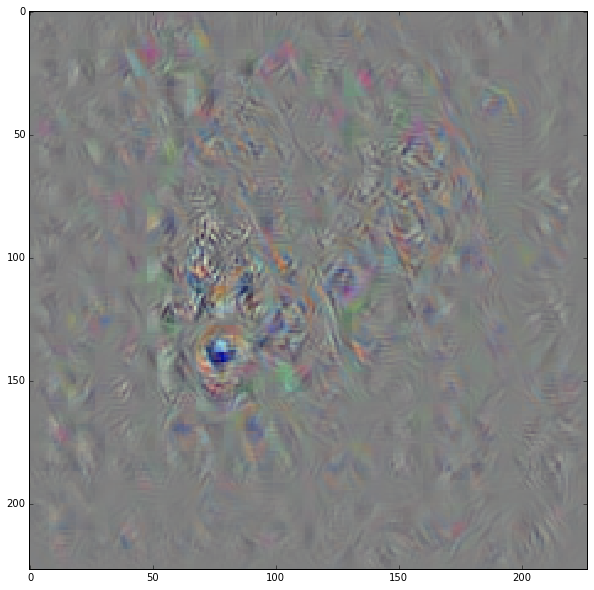

In [7]:
from tfs.core.util import *
%pylab inline

layer_name = 'fc8'
channelId=290
data_blob

figure(figsize=(10,10))
img = visnet.vis_image(sess,layer_name,channelId,data_blob)
imshow(img,interpolation='nearest')